<a href="https://colab.research.google.com/github/pedro162/computer_vision/blob/main/style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
tf.__version__

'2.17.0'

In [2]:
network = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
network.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
len(network.layers)

22

##Loading and preprocessing images

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


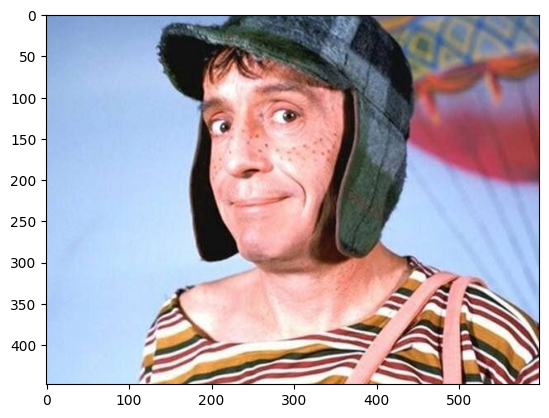

In [6]:
image_of_content = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/arquivos_curos_visao_computacional/drive-download-20230813T171824Z-001/Images/chaves.jpeg")
plt.imshow(image_of_content);

In [7]:
type(image_of_content)

PIL.JpegImagePlugin.JpegImageFile

In [8]:
image_of_content = tf.keras.preprocessing.image.img_to_array(image_of_content)

In [9]:
type(image_of_content)

numpy.ndarray

In [10]:
image_of_content.shape

(448, 598, 3)

In [11]:
image_of_content.min(), image_of_content.max()

(0.0, 255.0)

In [12]:
image_of_content = image_of_content /  255

In [13]:
image_of_content.min(), image_of_content.max()

(0.0, 1.0)

In [14]:
image_of_content

array([[[0.47843137, 0.6039216 , 0.8039216 ],
        [0.47843137, 0.6039216 , 0.8039216 ],
        [0.47843137, 0.6039216 , 0.8039216 ],
        ...,
        [0.38039216, 0.45882353, 0.5529412 ],
        [0.38039216, 0.45882353, 0.5529412 ],
        [0.38039216, 0.45882353, 0.5529412 ]],

       [[0.4862745 , 0.6117647 , 0.8117647 ],
        [0.4862745 , 0.6117647 , 0.8117647 ],
        [0.4862745 , 0.6117647 , 0.8117647 ],
        ...,
        [0.3882353 , 0.46666667, 0.56078434],
        [0.3882353 , 0.46666667, 0.56078434],
        [0.3882353 , 0.46666667, 0.56078434]],

       [[0.49019608, 0.6156863 , 0.8156863 ],
        [0.49019608, 0.6156863 , 0.8156863 ],
        [0.49019608, 0.6156863 , 0.8156863 ],
        ...,
        [0.3882353 , 0.4745098 , 0.5686275 ],
        [0.3882353 , 0.4745098 , 0.5686275 ],
        [0.3882353 , 0.4745098 , 0.5686275 ]],

       ...,

       [[0.7294118 , 0.8627451 , 1.        ],
        [0.7254902 , 0.85882354, 1.        ],
        [0.7254902 , 0

In [15]:
image_of_content = image_of_content[tf.newaxis, :]
image_of_content.shape

(1, 448, 598, 3)

In [16]:
image_of_style = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/arquivos_curos_visao_computacional/drive-download-20230813T171824Z-001/Images/tarsila_amaral.jpg")

In [17]:
#image_of_style = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/arquivos_curos_visao_computacional/drive-download-20230813T171824Z-001/Images/vangogh.jpg")

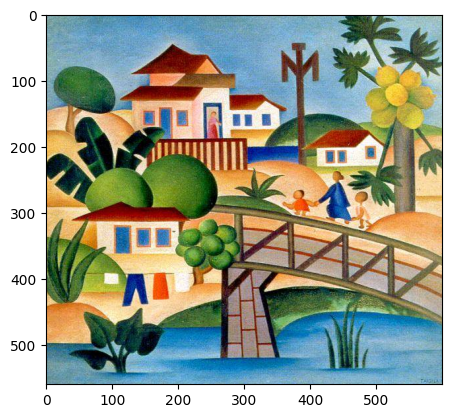

In [18]:
plt.imshow(image_of_style)

In [19]:
image_of_style = tf.keras.preprocessing.image.img_to_array(image_of_style)
image_of_style = image_of_style / 255
image_of_style = image_of_style[tf.newaxis, :]
image_of_style.shape

(1, 560, 600, 3)

In [20]:
content_layer = ["block4_conv2"]
style_layers = ["block1_conv1",
                "block2_conv1",
                "block3_conv1",
                "block4_conv1",
                "block5_conv1"]

In [21]:
number_of_conent_layers = len(content_layer)
number_of_style_layers = len(style_layers)
print(number_of_conent_layers, number_of_style_layers)

1 5


In [22]:
def vgg_layers(layer_names):
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  outputs = [vgg.get_layer(name).output for name in layer_names]
  model = tf.keras.Model(inputs=[vgg.input], outputs=outputs)
  return model

In [23]:
style_stractor = vgg_layers(style_layers)

In [24]:
style_stractor.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,944,960 (49.38 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,944,960 (49.38 MB)

In [25]:
style_stractor.outputs

[<KerasTensor shape=(None, None, None, 64), dtype=float32, sparse=False, name=keras_tensor_23>,
 <KerasTensor shape=(None, None, None, 128), dtype=float32, sparse=False, name=keras_tensor_26>,
 <KerasTensor shape=(None, None, None, 256), dtype=float32, sparse=False, name=keras_tensor_29>,
 <KerasTensor shape=(None, None, None, 512), dtype=float32, sparse=False, name=keras_tensor_34>,
 <KerasTensor shape=(None, None, None, 512), dtype=float32, sparse=False, name=keras_tensor_39>]

In [26]:
outputs_of_style = style_stractor(image_of_style)

In [27]:
len(outputs_of_style)

5

In [28]:
outputs_of_style[1].shape

TensorShape([1, 280, 300, 128])

In [29]:
outputs_of_style[0].shape
outputs_of_style[1].shape
outputs_of_style[2].shape
outputs_of_style[3].shape
outputs_of_style[4].shape

TensorShape([1, 35, 37, 512])

In [30]:
#https://www.tensorflow.org/api_docs/python/tf/einsum
def gram_matrix(activations):
  result = tf.linalg.einsum('bijc,bijd->bcd', activations, activations)
  input_shape = tf.shape(activations)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result / num_locations

In [31]:
outputs_of_style[0]

<tf.Tensor: shape=(1, 560, 600, 64), dtype=float32, numpy=
array([[[[0.0000000e+00, 1.0877684e-01, 6.1876804e-02, ...,
          4.7548777e-01, 4.9462211e-01, 1.5644577e-01],
         [0.0000000e+00, 2.0908591e-01, 3.7850654e-01, ...,
          1.7786789e-01, 1.4868840e+00, 1.1423519e+00],
         [0.0000000e+00, 2.0027554e-01, 3.8594386e-01, ...,
          1.3720292e-01, 1.5296973e+00, 1.1784816e+00],
         ...,
         [0.0000000e+00, 3.3374473e-01, 5.1606625e-01, ...,
          0.0000000e+00, 1.6996144e+00, 1.3344206e+00],
         [0.0000000e+00, 3.4465256e-01, 5.2247041e-01, ...,
          0.0000000e+00, 1.7055957e+00, 1.3397942e+00],
         [7.8262198e-01, 4.2381793e-01, 7.7576435e-01, ...,
          4.4776672e-01, 2.4687252e+00, 2.3798752e+00]],

        [[0.0000000e+00, 1.1056373e-01, 0.0000000e+00, ...,
          8.2489133e-02, 0.0000000e+00, 0.0000000e+00],
         [6.3421273e-01, 2.3642045e-01, 3.5782573e-01, ...,
          0.0000000e+00, 5.8060557e-01, 7.0158607e-01

In [32]:
gram_matrix(outputs_of_style[0])

<tf.Tensor: shape=(1, 64, 64), dtype=float32, numpy=
array([[[0.63098735, 0.28931642, 0.2851602 , ..., 0.10537568,
         0.369587  , 0.45012608],
        [0.28931642, 0.24121156, 0.18381073, ..., 0.03157694,
         0.19594139, 0.21715762],
        [0.2851602 , 0.18381073, 0.16743274, ..., 0.02779872,
         0.19410352, 0.22709455],
        ...,
        [0.10537568, 0.03157694, 0.02779872, ..., 0.08297461,
         0.06948002, 0.06642947],
        [0.369587  , 0.19594139, 0.19410352, ..., 0.06948002,
         0.28682625, 0.3185408 ],
        [0.45012608, 0.21715762, 0.22709455, ..., 0.06642947,
         0.3185408 , 0.37468514]]], dtype=float32)>

In [33]:
class StyleContyentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super().__init__()
    self.vgg = vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.number_of_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    inputs = inputs * 255.0
    #0 - 1
    # - 127.50 - 127.50
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    outputs_of_style = outputs[:self.number_of_style_layers] #0-4
    outputs_of_content = outputs[self.number_of_style_layers:] # 5:
    #style_outputs = [gram_matrix(outputs_of_style) for layer in outputs_of_style]
    style_outputs = [gram_matrix(layer) for layer in outputs_of_style]

    style_dict = {style_name:value for style_name, value in zip(self.style_layers, style_outputs)}
    content_dict = {content_name:value for content_name, value in zip(self.content_layers, outputs_of_content)}

    return {'content':content_dict, 'tyle':style_dict}

In [34]:
extractor = StyleContyentModel(style_layers, content_layer)

In [35]:
results = extractor(image_of_content)

In [36]:
results

{'content': {'block4_conv2': <tf.Tensor: shape=(1, 56, 74, 512), dtype=float32, numpy=
  array([[[[  17.335257,    0.      ,    0.      , ...,  574.69464 ,
               0.      ,    0.      ],
           [   0.      ,    0.      ,    0.      , ...,  291.73862 ,
             132.49077 ,    0.      ],
           [   0.      ,    0.      ,    0.      , ...,  333.45657 ,
             117.71992 ,    0.      ],
           ...,
           [ 692.7539  ,    0.      ,    0.      , ..., 1512.0807  ,
              10.164075,  321.67056 ],
           [ 139.49515 ,    0.      ,    0.      , ..., 1108.5737  ,
             102.29349 ,  179.42451 ],
           [ 152.06622 ,    0.      ,    0.      , ...,  471.31982 ,
             179.42244 ,  671.04755 ]],
  
          [[   0.      ,    0.      ,    0.      , ...,  548.79645 ,
               0.      ,    0.      ],
           [   0.      ,    0.      ,    0.      , ...,   43.473793,
               0.      ,    0.      ],
           [   0.      ,    0

In [37]:
for key, value in results.items():
  print(key, value.keys())

content dict_keys(['block4_conv2'])
tyle dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [38]:
target_style = extractor(image_of_style)['tyle']
target_content = extractor(image_of_content)['content']

In [39]:
len(target_style), len(target_content)

(5, 1)

In [40]:
new_image = tf.Variable(image_of_content)

In [41]:
weight_content = 1
weight_style = 1000

In [42]:
optimizer = tf.optimizers.Adam(learning_rate=0.2)

##Traning

In [43]:
real_prices = np.array([10000, 15000])
predicts = np.array([8000, 15900])

np.sum(abs(predicts - real_prices)) / 2

1450.0

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
mean_absolute_error(real_prices, predicts)

1450.0

In [46]:
mean_squared_error(real_prices, predicts)

2405000.0

In [47]:
((real_prices - predicts) ** 2).mean()

2405000.0

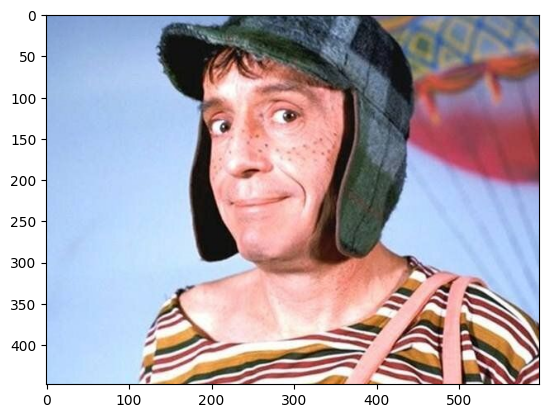

In [48]:
plt.imshow(tf.squeeze(image_of_content, axis=0))

Epoch:  500 Content loss:  884664.1 Style loss:  1838516100.0 Total loss:  367704100000.0


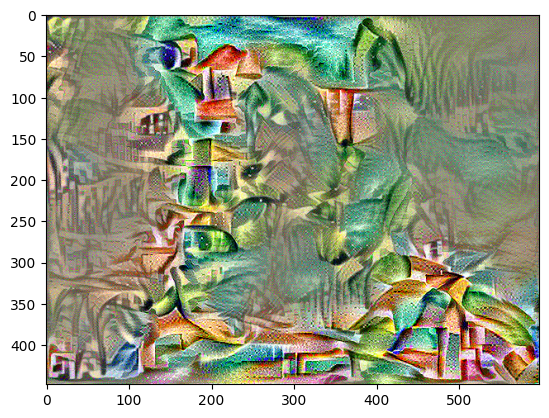

In [ ]:
epochs = 3000
printing = 500

for epoch in range(epochs):
  with tf.GradientTape() as tape:
    outputs = extractor(new_image)

    content_output = outputs['content']
    style_output = outputs['tyle']

    loss_content = tf.add_n([tf.reduce_mean((content_output[name] - target_content[name]) ** 2) for name in content_output.keys()])
    loss_style = tf.add_n([tf.reduce_mean((style_output[name] - target_style[name]) ** 2) for name in style_output.keys()])

    total_loss = loss_content * weight_content / number_of_conent_layers + loss_style * weight_style / number_of_style_layers

  gradient = tape.gradient(total_loss, new_image)
  optimizer.apply_gradients([(gradient, new_image)])
  new_image.assign(tf.clip_by_value(new_image, clip_value_min=0.0, clip_value_max=1.0))
  if (epoch + 1) % printing == 0:
    print('Epoch: ', epoch + 1, 'Content loss: ', loss_content.numpy(), 'Style loss: ', loss_style.numpy(), 'Total loss: ', total_loss.numpy())
    plt.imshow(tf.squeeze(new_image, axis=0))
    plt.show()


In [ ]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10))
ax1.imshow(tf.squeeze(image_of_content, axis=0))
ax1.set_title("Content image")
ax2.imshow(tf.squeeze(new_image, axis=0))
ax2.set_title("New image")
ax3.imshow(tf.squeeze(image_of_style, axis=0))
ax3.set_title("Style image");
plt.axis('off')